<a href="https://colab.research.google.com/github/ashkanb77/Detect-Chest-xray-PNEUMONIA/blob/main/Chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 2.28G/2.29G [00:26<00:00, 122MB/s]
100% 2.29G/2.29G [00:26<00:00, 91.4MB/s]


In [ ]:
import zipfile

zipfile.ZipFile('chest-xray-pneumonia.zip').extractall('')



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train = data_gen.flow_from_directory(
    'chest_xray/train', target_size=(64, 64), color_mode='grayscale', class_mode='binary', batch_size=200
    )

Found 5216 images belonging to 2 classes.


In [ ]:
test = data_gen.flow_from_directory(
    'chest_xray/test', target_size=(64, 64), color_mode='grayscale', class_mode='binary', batch_size=200
    )

Found 624 images belonging to 2 classes.


In [ ]:
val = data_gen.flow_from_directory(
    'chest_xray/val', target_size=(64, 64), color_mode='grayscale', class_mode='binary'
    )

Found 16 images belonging to 2 classes.


In [ ]:
model = Sequential([
                    Conv2D(32, (7, 7), input_shape=(64, 64, 1), activation='relu'),
                    MaxPool2D(),
                    Conv2D(32, (3, 3), activation='relu'),
                    MaxPool2D(),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPool2D(),
                    Conv2D(128, (3, 3), activation='relu'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(1, activation='sigmoid')

])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 58, 58, 32)        1600      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 5, 5, 64)       

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, mode='min')
r = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.00001)
check = ModelCheckpoint('chest.h5', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
model.compile(Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train, steps_per_epoch=len(train), validation_data=test, validation_steps=len(test), epochs=30, callbacks=[es, r, check])

Epoch 1/30
27/27 [==============================] - 47s 2s/step - loss: 0.5907 - accuracy: 0.7241 - val_loss: 0.7162 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/30
27/27 [==============================] - 45s 2s/step - loss: 0.5544 - accuracy: 0.7429 - val_loss: 0.6273 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/30
27/27 [==============================] - 45s 2s/step - loss: 0.4613 - accuracy: 0.7715 - val_loss: 0.4424 - val_accuracy: 0.8061 - lr: 0.0010
Epoch 4/30
27/27 [==============================] - 44s 2s/step - loss: 0.3421 - accuracy: 0.8462 - val_loss: 0.3880 - val_accuracy: 0.8253 - lr: 0.0010
Epoch 5/30
27/27 [==============================] - 45s 2s/step - loss: 0.2936 - accuracy: 0.8727 - val_loss: 0.3707 - val_accuracy: 0.8221 - lr: 0.0010
Epoch 6/30
27/27 [==============================] - 44s 2s/step - loss: 0.2535 - accuracy: 0.8911 - val_loss: 0.4061 - val_accuracy: 0.8189 - lr: 0.0010
Epoch 7/30
27/27 [==============================] - 45s 2s/step - loss: 0.2325 - a

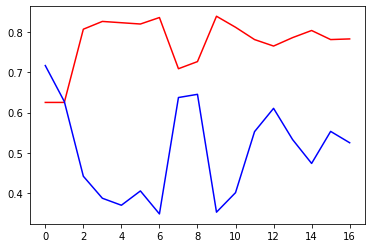

In [ ]:
plt.plot(history.history['val_accuracy'], color='r')
plt.plot(history.history['val_loss'], color='b')